# A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [233]:
import pandas as pd
%matplotlib inline

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [234]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", na_values = ["???"]) 
df = df.head(30000) 

## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [235]:
df.columns

Index(['Owner Zip Code', 'Animal Name', 'Animal Gender', 'Primary Breed',
       'Secondary Breed', 'Animal Dominant Color', 'Animal Secondary Color',
       'Animal Third Color', 'Animal Birth', 'Spayed or Neut',
       'Guard or Trained', 'Vaccinated', 'Application Date',
       'License Issued Date', 'License Expired Date'],
      dtype='object')

In [236]:
df.shape

(30000, 15)

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [237]:
#Each row is a different pet dog. 
#The column Vaccinated says if the dog has been vaccinated or not 
#The column Owner Zip Code is where the dog's owner lives in NYC 

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below.

In [238]:
#How many different primary breeds of dogs live in XXXX zip code/Brooklyn? 
#What percentage of dogs are trained and vaccinated? 
#What zip codes do the most dachsunds live? 
#What is the most common dog name in NYC? 

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [239]:
df['Primary Breed'].value_counts().head(10)  

Unknown                                 4777
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Name: Primary Breed, dtype: int64

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

In [240]:
df[df['Primary Breed'] != 'Unknown']['Primary Breed'].value_counts().head(10)

Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: Primary Breed, dtype: int64

## What are the most popular dog names?

In [241]:
df.columns

Index(['Owner Zip Code', 'Animal Name', 'Animal Gender', 'Primary Breed',
       'Secondary Breed', 'Animal Dominant Color', 'Animal Secondary Color',
       'Animal Third Color', 'Animal Birth', 'Spayed or Neut',
       'Guard or Trained', 'Vaccinated', 'Application Date',
       'License Issued Date', 'License Expired Date'],
      dtype='object')

In [242]:
#Still have unknown (uncapitalized)...is still included. Is there a way to ignore 2 things at a time? 
df[df['Animal Name'] != 'UNKNOWN']['Animal Name'].value_counts().head() 

Max        202
Unknown    197
Bella      193
Charlie    172
Lola       146
Name: Animal Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [243]:
#(df['Animal Name'] == 'Maija').value_counts() 
df['Animal Name'].str.contains("Maija", na = False).value_counts()  
#Since we know there are 30000 in the excel file uploaded and it says we have 30000 False, 
#there are no dogs have the name Maija 

False    30000
Name: Animal Name, dtype: int64

In [244]:
(df['Animal Name'] == 'Max').value_counts()  

False    29798
True       202
Name: Animal Name, dtype: int64

In [245]:
(df['Animal Name'] == 'Maxwell').value_counts()   

False    29989
True        11
Name: Animal Name, dtype: int64

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [246]:
df.columns
df['Guard or Trained'].value_counts(normalize = True, dropna=False)   

No     0.660300
NaN    0.339133
Yes    0.000567
Name: Guard or Trained, dtype: float64

## What are the actual numbers?

In [247]:
df['Guard or Trained'].value_counts(dropna=False) 

No     19809
NaN    10174
Yes       17
Name: Guard or Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [297]:
#I think this is answered above

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [249]:
df['Guard or Trained'].fillna("No", inplace = True) 

In [250]:
df['Guard or Trained'].value_counts() 

No     29983
Yes       17
Name: Guard or Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [251]:
df.columns


Index(['Owner Zip Code', 'Animal Name', 'Animal Gender', 'Primary Breed',
       'Secondary Breed', 'Animal Dominant Color', 'Animal Secondary Color',
       'Animal Third Color', 'Animal Birth', 'Spayed or Neut',
       'Guard or Trained', 'Vaccinated', 'Application Date',
       'License Issued Date', 'License Expired Date'],
      dtype='object')

In [252]:
#I think this is wrong 
guard_dogs = df[df['Guard or Trained'] == 'Yes']  
#guard_dogs
guard_dogs.groupby('Guard or Trained')['Primary Breed'].value_counts().head() 

Guard or Trained  Primary Breed             
Yes               Unknown                       5
                  German Shepherd Dog           3
                  Doberman Pinscher             1
                  German Shepherd Crossbreed    1
                  Golden Retriever              1
Name: Primary Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [253]:
df['year'] = df['Animal Birth'].apply(lambda birth: birth.year)  
df
#df['Animal Birth'] = df[''.str.replace("%","")

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014
5,10013,Queen,F,Akita Crossbreed,NaN,Charcoal,Red,NaN,2013-04-01,No,No,Yes,2014-09-12 16:14:48.487,2014-09-12,2017-09-12,2013
6,10035,Paige Sable Orta,F,American Pit Bull Mix / Pit Bull Mix,NaN,White,Gray,NaN,2014-07-01,No,No,No,2014-09-12 16:22:54.113,2014-09-12,2017-09-12,2014
7,10465,Yogi,M,Boxer,NaN,TAN,BLACK,NaN,2010-09-01,Yes,No,Yes,2014-09-12 16:47:35.317,2014-09-12,2017-10-02,2010
8,10013,Chewbacca,F,Labrador Retriever Crossbreed,NaN,RED,NaN,NaN,2012-06-01,Yes,No,Yes,2014-09-12 17:42:56.647,2014-09-12,2019-10-01,2012
9,10013,IAN,M,Unknown,GREYHOUND TER X,WHITE,BLACK,NaN,2006-01-01,Yes,No,Yes,2014-09-12 19:09:19.020,2014-09-12,2019-10-30,2006


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [254]:
df['age'] = (2017 - df['year']) 
df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,10
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,4
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,3
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,9
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,3
5,10013,Queen,F,Akita Crossbreed,NaN,Charcoal,Red,NaN,2013-04-01,No,No,Yes,2014-09-12 16:14:48.487,2014-09-12,2017-09-12,2013,4
6,10035,Paige Sable Orta,F,American Pit Bull Mix / Pit Bull Mix,NaN,White,Gray,NaN,2014-07-01,No,No,No,2014-09-12 16:22:54.113,2014-09-12,2017-09-12,2014,3
7,10465,Yogi,M,Boxer,NaN,TAN,BLACK,NaN,2010-09-01,Yes,No,Yes,2014-09-12 16:47:35.317,2014-09-12,2017-10-02,2010,7
8,10013,Chewbacca,F,Labrador Retriever Crossbreed,NaN,RED,NaN,NaN,2012-06-01,Yes,No,Yes,2014-09-12 17:42:56.647,2014-09-12,2019-10-01,2012,5
9,10013,IAN,M,Unknown,GREYHOUND TER X,WHITE,BLACK,NaN,2006-01-01,Yes,No,Yes,2014-09-12 19:09:19.020,2014-09-12,2019-10-30,2006,11


In [255]:
df['age'].mean() 

7.7124333333333333

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [256]:
df2 = pd.read_csv("zipcodes-neighborhoods.csv", na_values = ["???"])    
df2['borough'].value_counts() 

Queens           61
Manhattan        43
Brooklyn         37
Bronx            25
Staten Island    12
Name: borough, dtype: int64

In [257]:
combined_df = df.merge(df2, left_on="Owner Zip Code", right_on="zip")
combined_df 

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,10,Upper West Side,10024,Manhattan
1,10024,Louie,M,Unknown,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,9,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,6,Upper West Side,10024,Manhattan
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,No,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,6,Upper West Side,10024,Manhattan
4,10024,Harlen,M,Unknown,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,10,Upper West Side,10024,Manhattan
5,10024,Barney,M,Beagle,NaN,BROWN,WHITE,ORANGE,2004-06-01,Yes,No,Yes,2014-09-29 15:58:56.570,2014-09-29,2016-10-01,2004,13,Upper West Side,10024,Manhattan
6,10024,Peyton,M,Unknown,Black Mouth Cur,BRINDLE,BLACK,NaN,2012-08-01,Yes,No,Yes,2014-10-02 11:23:37.220,2014-10-02,2016-09-24,2012,5,Upper West Side,10024,Manhattan
7,10024,Phoebe,F,Cavalier King Charles Spaniel,NaN,GOLD,APRICOT,WHITE,2009-01-01,Yes,No,Yes,2014-10-06 15:13:32.223,2014-10-06,2016-10-25,2009,8,Upper West Side,10024,Manhattan
8,10024,Baci,F,Dachshund,NaN,Black,Tan,NaN,2013-02-01,Yes,No,Yes,2014-10-06 20:05:14.213,2014-10-06,2016-10-06,2013,4,Upper West Side,10024,Manhattan
9,10024,Delilah Eddy,F,German Shepherd Crossbreed,NaN,BLACK,TAN,NaN,2007-05-01,Yes,No,Yes,2014-10-09 13:55:43.907,2014-10-09,2019-10-11,2007,10,Upper West Side,10024,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [258]:
#Most popular name in the Bronx 
bronx_names = combined_df[combined_df['borough'].str.contains("Bronx", na=False)]
bronx_names.groupby('borough')['Animal Name'].value_counts().groupby(level=0).head() 

borough  Animal Name
Bronx    Bella          22
         Max            21
         Rocky          20
         Unknown        16
         Lucky          15
Name: Animal Name, dtype: int64

In [259]:
#Most popular name in Brooklyn 
brooklyn_names = combined_df[combined_df['borough'].str.contains("Brooklyn", na=False)]
brooklyn_names.groupby('borough')['Animal Name'].value_counts().groupby(level=0).head()   

borough   Animal Name
Brooklyn  Unknown        97
          Max            46
          Bella          45
          UNKNOWN        45
          unknown        45
Name: Animal Name, dtype: int64

In [260]:
#Most popular name on the Upper East Side 
ues_names = combined_df[combined_df['neighborhood'].str.contains('Upper East Side', na=False)] 
ues_names.groupby('neighborhood')['Animal Name'].value_counts().groupby(level=0).head() 

neighborhood     Animal Name
Upper East Side  Charlie        19
                 Bella          12
                 NO NAME        11
                 Lola           10
                 Lucy           10
Name: Animal Name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [261]:
combined_df.groupby('borough')['Animal Name'].value_counts().groupby(level=0).head() 

borough        Animal Name
Bronx          Bella           22
               Max             21
               Rocky           20
               Unknown         16
               Lucky           15
Brooklyn       Unknown         97
               Max             46
               Bella           45
               UNKNOWN         45
               unknown         45
Manhattan      UNKNOWN        107
               Lola            71
               Lucy            67
               Charlie         65
               Max             57
Queens         Max             50
               Bella           48
               Rocky           40
               Charlie         39
               Coco            35
Staten Island  Max             27
               Bella           25
               Unknown         17
               Buddy           16
               Rocky           16
Name: Animal Name, dtype: int64

## What breed of dogs are the least likely to be spayed? Male or female?

In [262]:
combined_df.columns

Index(['Owner Zip Code', 'Animal Name', 'Animal Gender', 'Primary Breed',
       'Secondary Breed', 'Animal Dominant Color', 'Animal Secondary Color',
       'Animal Third Color', 'Animal Birth', 'Spayed or Neut',
       'Guard or Trained', 'Vaccinated', 'Application Date',
       'License Issued Date', 'License Expired Date', 'year', 'age',
       'neighborhood', 'zip', 'borough'],
      dtype='object')

In [263]:
combined_df.groupby('Animal Gender')['Spayed or Neut'].value_counts().groupby(level=0).head() 

Animal Gender  Spayed or Neut
               Yes                   3
F              Yes               11620
               No                 1930
M              Yes               12677
               No                 3343
Name: Spayed or Neut, dtype: int64

In [264]:
#Number of dogs of each breed 
combined_df['Primary Breed'].value_counts().head(25) 


Unknown                                 4714
Yorkshire Terrier                       1861
Shih Tzu                                1739
Chihuahua                               1516
Maltese                                 1116
Labrador Retriever                      1065
American Pit Bull Terrier/Pit Bull       776
Labrador Retriever Crossbreed            723
American Pit Bull Mix / Pit Bull Mix     715
Jack Russell Terrier                     547
Beagle                                   541
Pomeranian                               536
Havanese                                 503
Golden Retriever                         497
Cocker Spaniel                           483
German Shepherd Dog                      414
Pug                                      410
Poodle, Miniature                        366
Poodle, Toy                              361
German Shepherd Crossbreed               357
Cavalier King Charles Spaniel            350
Boston Terrier                           333
Schnauzer,

In [265]:
#How many of each breed are not fixed 
not_spayed = combined_df[combined_df['Spayed or Neut'].str.contains('No', na = False)] 
not_spayed.groupby('Primary Breed')['Spayed or Neut'].value_counts().sort_values(ascending = False).head(25)   

Primary Breed                         Spayed or Neut
Yorkshire Terrier                     No                531
Unknown                               No                416
Shih Tzu                              No                401
Chihuahua                             No                303
Maltese                               No                300
American Pit Bull Terrier/Pit Bull    No                173
Pomeranian                            No                148
German Shepherd Dog                   No                124
Labrador Retriever                    No                113
Golden Retriever                      No                110
Cocker Spaniel                        No                 96
Shiba Inu                             No                 93
French Bulldog                        No                 88
American Pit Bull Mix / Pit Bull Mix  No                 86
Jack Russell Terrier                  No                 80
Havanese                              No       

In [266]:
#divide the second number by the first number and sort it 

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [282]:
colors = ['WHITE', 'white', 'BLACK', 'black', 'gray', 'GREY', 'GRAY'] 
#combined_df['monochrome'] = 
combined_df['monochrome'] = combined_df['Animal Dominant Color'].isin(colors) & (combined_df['Animal Secondary Color'].isnull()) & (df['Animal Third Color'].isnull())
#combined_df['monochrome'].value_counts() 
combined_df['monochrome'].value_counts() 

 

False    27542
True      2031
Name: monochrome, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

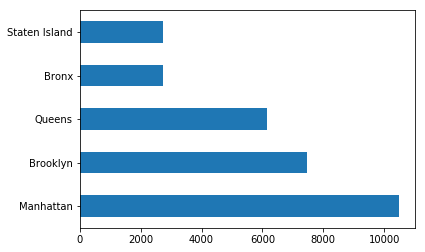

In [268]:
combined_df.columns
combined_df['borough'].value_counts().plot(kind = 'barh')  


## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [269]:
another_df = pd.read_csv("boro_population.csv", na_values = ["???"])    
another_df.columns 
#combined_df.columns

Index(['borough', 'population', 'area_sqmi'], dtype='object')

In [295]:
three_df = another_df.merge(combined_df, left_on="borough", right_on="borough") 
three_df.groupby('population')['borough'].value_counts()  

#population of each borough 

population  borough      
474558      Staten Island     2727
1455444     Bronx             2748
1644518     Manhattan        10478
2339150     Queens            6154
2636735     Brooklyn          7466
Name: borough, dtype: int64

In [294]:
#dogs per borough 
three_df.columns 
three_df['borough'].value_counts() 


Manhattan        10478
Brooklyn          7466
Queens            6154
Bronx             2748
Staten Island     2727
Name: borough, dtype: int64

In [298]:
#I see how you get the population per borough and how you get the dogs per borough. But how do you divide them (without just doing it by hand!)

#manhattan_dogs = three_df[three_df['borough'].str.contains("Manhattan"), na=False)] 
#manhattan_pop = three_df[three_df[b]]
#manhattan_dogs / 

SyntaxError: invalid syntax (<ipython-input-298-ffe620f4c62d>, line 1)

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

## What percentage of dogs are not guard dogs?